In [1]:
import gym
import numpy as np
from collections import deque
from IPython.display import clear_output
import pandas as pd

In [2]:
env = gym.make('CliffWalking-v0')

In [4]:
class SarsaAgent():
    def __init__(self, env, epsilon, gamma, alpha, epsilon_decay, epsilon_min):
        self.nS=env.nS
        self.epsilon_decay=epsilon_decay
        self.epsilon_min=epsilon_min
        self.nA=env.nA
        self.gamma=gamma
        self.alpha=alpha
        self.epsilon=epsilon
        self.Q=np.zeros((self.nS,self.nA))
    def act(self, state, Q_s):
        policy=np.ones(self.nA)*(self.epsilon/self.nA)
        policy[np.argmax(Q_s)]=1-self.epsilon+self.epsilon/self.nA
        return np.random.choice(np.arange(self.nA), p=policy)
    def update(self, state, action, reward, next_state, next_action, done):
        if self.epsilon>self.epsilon_min:
            self.epsilon = self.epsilon_decay*self.epsilon
        if not done:
            self.Q[state][action]=(1-self.alpha)*self.Q[state][action]+self.alpha*(reward+self.gamma*self.Q[next_state][next_action])
        else:
            self.Q[state][action]=reward
            

In [29]:
agent = SarsaAgent(env=env, epsilon=1.0, gamma=1.0, alpha=0.1, epsilon_decay=0.9, epsilon_min=0)
score=deque(maxlen=1)
sarsa_scores=list()
ans=10
for i_episode in range(500):
    tot=0
    state=env.reset()
    while True:
        action=agent.act(state, agent.Q[state])
        next_state, reward, done, _ = env.step(action)
        next_action=agent.act(next_state, agent.Q[next_state])
        agent.update(state, action, reward, next_state, next_action, done)
        tot+=reward
        state=next_state
        if done:
            score.append(tot)
            sarsa_scores.append(np.mean(score))
            print("Episode {} ... score: {}".format(i_episode+1, np.mean(score)))
            clear_output(True)
            break

Episode 500 ... score: -13.0


In [21]:
class QAgent():
    def __init__(self, env, epsilon, gamma, alpha, epsilon_decay, epsilon_min):
        self.nS=env.nS
        self.epsilon_decay=epsilon_decay
        self.epsilon_min=epsilon_min
        self.nA=env.nA
        self.gamma=gamma
        self.alpha=alpha
        self.epsilon=epsilon
        self.Q=np.zeros((self.nS,self.nA))
    def act(self, state, Q_s):
        policy=np.ones(self.nA)*(self.epsilon/self.nA)
        policy[np.argmax(Q_s)]=1-self.epsilon+self.epsilon/self.nA
        return np.random.choice(np.arange(self.nA), p=policy)
    def update(self, state, action, reward, next_state, done):
        if self.epsilon>self.epsilon_min:
            self.epsilon = self.epsilon_decay*self.epsilon
        if not done:
            self.Q[state][action]=(1-self.alpha)*self.Q[state][action]+self.alpha*(reward+self.gamma*np.max(self.Q[next_state]))
        else:
            self.Q[state][action]=reward
            

In [28]:
agent = QAgent(env=env, epsilon=1.0, gamma=1.0, alpha=0.1, epsilon_min=0.0, epsilon_decay=0.9)
score=deque(maxlen=1)
Q_scores=list()
ans=10
for i_episode in range(500):
    tot=0
    state=env.reset()
    while True:
        action=agent.act(state, agent.Q[state])
        next_state, reward, done, _ = env.step(action)
        agent.update(state, action, reward, next_state, done)
        tot+=reward
        state=next_state
        if done:
            score.append(tot)
            Q_scores.append(np.mean(score))
            print("Episode {} ... score: {}".format(i_episode+1, np.mean(score)))
            clear_output(True)
            break

Episode 500 ... score: -13.0


In [23]:
class Esarsa_Agent():
    def __init__(self, env, epsilon, gamma, alpha, epsilon_decay, epsilon_min):
        self.nS=env.nS
        self.epsilon_min=epsilon_min
        self.epsilon_decay=epsilon_decay
        self.nA=env.nA
        self.gamma=gamma
        self.alpha=alpha
        self.epsilon=epsilon
        self.Q=np.zeros((self.nS,self.nA))
    def act(self, state, Q_s):
        policy=np.ones(self.nA)*(self.epsilon/self.nA)
        policy[np.argmax(Q_s)]=1-self.epsilon+self.epsilon/self.nA
        return np.random.choice(np.arange(self.nA), p=policy)
    def update(self, state, action, reward, next_state, next_action, done):
        if self.epsilon>self.epsilon_min:
            self.epsilon = self.epsilon_decay*self.epsilon
        policy=np.ones(self.nA)*(self.epsilon/self.nA)
        policy[np.argmax(self.Q[next_state])]=1-self.epsilon+self.epsilon/self.nA
        if not done:
            self.Q[state][action]=(1-self.alpha)*self.Q[state][action]+self.alpha*(reward+self.gamma*np.dot(policy,self.Q[next_state]))
        else:
            self.Q[state][action]=reward
            

In [26]:
agent = Esarsa_Agent(env=env, epsilon=1.0, gamma=1.0, alpha=0.1, epsilon_min=0.0, epsilon_decay=0.9)
score=deque(maxlen=1)
Esarsa_scores=list()
ans=10
for i_episode in range(500):
    tot=0
    state=env.reset()
    while True:
        action=agent.act(state, agent.Q[state])
        next_state, reward, done, _ = env.step(action)
        next_action=agent.act(next_state, agent.Q[next_state])
        agent.update(state, action, reward, next_state, next_action, done)
        tot+=reward
        state=next_state
        if done:
            score.append(tot)
            Esarsa_scores.append(np.mean(score))
            print("Episode {} ... score: {}".format(i_episode+1, np.mean(score)))
            clear_output(True)
            break

Episode 500 ... score: -13.0


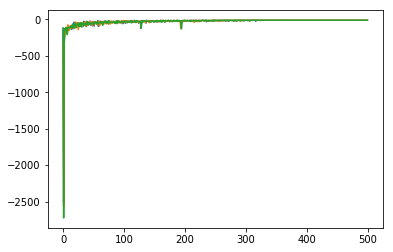

In [30]:
import matplotlib.pyplot as plt
plt.plot(Esarsa_scores)
plt.plot(Q_scores)
plt.plot(sarsa_scores)